In [115]:
# Importing used modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [147]:
# Importing data and cleaning it up
df = pd.read_csv('../ML-Cancer-SCC-2020-21/Children\'s Oncology Group Study 9906 for High-Risk Pediatric Training Stats (1).csv')
df = df.drop('TRAINING OR TEST SET?', axis = 1)
df = df.drop("Sample", axis =1)
dummies = pd.get_dummies(df['CONGENITAL ABNORMALITY'], drop_first = True, prefix= "CONGENITAL ABNORMALITY")
df = pd.concat([df.drop('CONGENITAL ABNORMALITY', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['CNS STATUS'], drop_first = True, prefix= "CNS STATUS")
df = pd.concat([df.drop('CNS STATUS', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['TESTICULAR INVOLVEMENT'], drop_first = True, prefix= "TESTICULAR INVOLVEMENT")
df = pd.concat([df.drop('TESTICULAR INVOLVEMENT', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['GENDER'], drop_first = True, prefix= "GENDER")
df = pd.concat([df.drop('GENDER', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['E2A-PBX, T(1;19)'], drop_first = True, prefix= "E2A-PBX, T(1;19)")
df = pd.concat([df.drop('E2A-PBX, T(1;19)', axis=1), dummies], axis=1)
df = df.drop("BCR-ABL, T(9;22)", axis =1)
dummies = pd.get_dummies(df['TEL-AML,T(12;21)'], drop_first = True, prefix= "TEL-AML,T(12;21)")
df = pd.concat([df.drop('TEL-AML,T(12;21)', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['MLL'], drop_first = True, prefix= "MLL")
df = pd.concat([df.drop('MLL', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['TISSUE TYPE'], drop_first = True, prefix= "TISSUE TYPE")
df = pd.concat([df.drop('TISSUE TYPE', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['RACE'], drop_first = True, prefix= "RACE")
df = pd.concat([df.drop('RACE', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['TRISOMY 4 AND 10'], drop_first = True, prefix= "TRISOMY 4 AND 10")
df = pd.concat([df.drop('TRISOMY 4 AND 10', axis=1), dummies], axis=1)
df = df.drop("AMPLIFICATION SET", axis = 1)
df = df.drop("HYBRIDIZATION SET", axis = 1)

In [148]:
df.head()

,"BLAST COUNT, % OF SAMPLE, -1=UNAVAILABLE","SAMPLE VIABILITY, % OF SAMPLE, -1=UNAVAILABLE",AGE IN DAYS AT DIAGNOSIS,"WBC, 1000/MICROLITER",CONGENITAL ABNORMALITY_None,CONGENITAL ABNORMALITY_Other,CONGENITAL ABNORMALITY_Unknown,"CNS STATUS_> 5 CSF WBC/ul with blasts on cytospin and/or eye involvement, cranial nerve involvement, parenchymal brain involvement",CNS STATUS_No CNS disease,TESTICULAR INVOLVEMENT_Positive,...,TISSUE TYPE_peripheral blood,RACE_Asian,RACE_Black or African American,RACE_Hispanic or Latino,RACE_Native Hawaiian or other Pacific Islander,RACE_Other,RACE_White,RACE_unknown,TRISOMY 4 AND 10_Positive,TRISOMY 4 AND 10_Unknown
0,90,66,5349,147.6,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,95,85,4918,5.5,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,95,88,5857,13.3,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1,46,713,110.3,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,90,98,5183,23.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


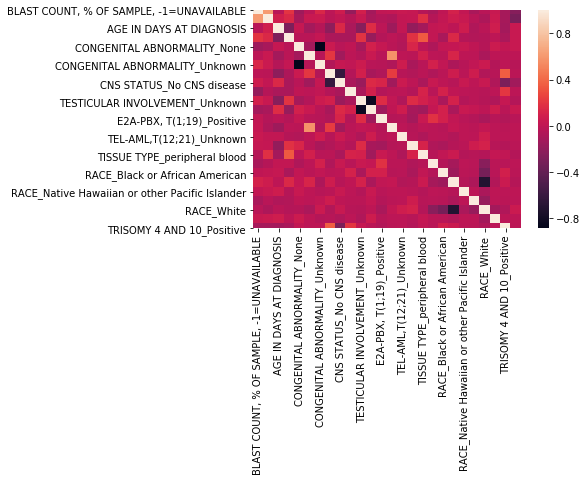

In [149]:
sns.heatmap(df.corr())

In [150]:
len(df.columns)

26

In [151]:
# Output = MLL